In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
eurusd = pd.read_csv("data/EURUSD_daily.csv", index_col='Date')

In [3]:
eurusd.index = pd.to_datetime(eurusd.index)

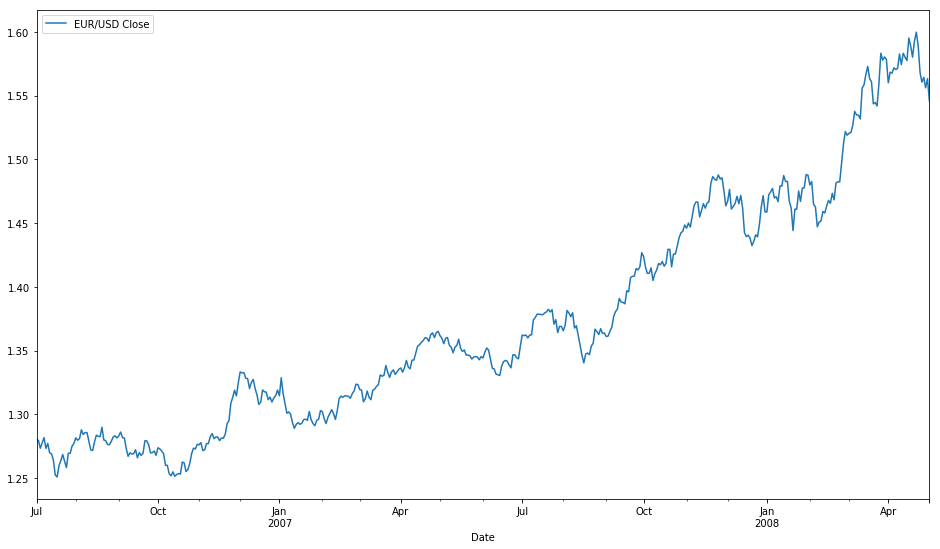

In [4]:
eurusd['2006-07-01':'2008-05-01'].plot(figsize=(16,9))

In [5]:
eurusd = eurusd['2006-07-01':'2008-05-01']

In [6]:
split_date = pd.Timestamp('03-01-2008')

In [7]:
train = eurusd.loc[:split_date]
test = eurusd.loc[split_date:]

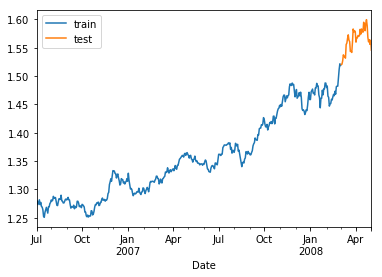

In [8]:
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [10]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

### Fully conected simple net

In [11]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [12]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [13]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [14]:
model.fit(X_train, y_train, epochs=200, batch_size=2, verbose=1, callbacks=[early_stop])

Epoch 1/200
434/434 [==============================] - 4s - loss: 0.0216     
Epoch 2/200
434/434 [==============================] - 0s - loss: 0.0045     
Epoch 3/200
434/434 [==============================] - 0s - loss: 0.0013     
Epoch 4/200
434/434 [==============================] - 0s - loss: 5.4894e-04     
Epoch 5/200
434/434 [==============================] - 0s - loss: 4.5761e-04     
Epoch 6/200
434/434 [==============================] - 0s - loss: 4.6218e-04     
Epoch 7/200
434/434 [==============================] - 0s - loss: 4.5892e-04     
Epoch 00006: early stopping


In [15]:
y_pred = model.predict(X_test)

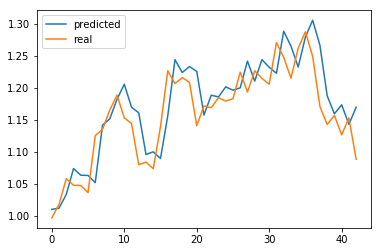

In [16]:
ax = plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

### Recurent net using LSTM

In [17]:
from keras.layers import LSTM

In [18]:
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

In [19]:
K.clear_session()

model = Sequential()

model.add(LSTM(6, input_shape=(1,1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.fit(X_train_t, y_train,
          epochs=100, batch_size=1, verbose=1,
          callbacks=[early_stop])

Epoch 1/100
434/434 [==============================] - 1s - loss: 0.0637     
Epoch 2/100
434/434 [==============================] - 1s - loss: 0.0180     
Epoch 3/100
434/434 [==============================] - 1s - loss: 0.0049     
Epoch 4/100
434/434 [==============================] - 1s - loss: 8.2578e-04     
Epoch 5/100
434/434 [==============================] - 1s - loss: 4.5662e-04     
Epoch 6/100
434/434 [==============================] - 1s - loss: 4.6372e-04     
Epoch 7/100
434/434 [==============================] - 1s - loss: 4.6813e-04     
Epoch 00006: early stopping


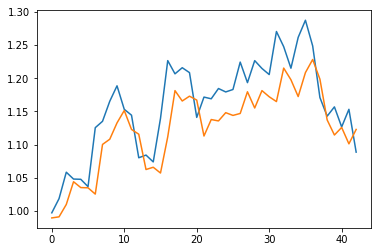

In [21]:
y_pred = model.predict(X_test_t)
plt.plot(y_test)
plt.plot(y_pred)

### With window

In [22]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index = test.index)
train_sc_df.head()

,Scaled
Date,
2006-07-03,0.109635
2006-07-04,0.105574
2006-07-05,0.083056
2006-07-06,0.098929
2006-07-07,0.114064


In [23]:
for s in range(1,21):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

In [24]:
train_sc_df.head(21)

,Scaled,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
Date,,,,,,,,,,,,,,,,,,,,,
2006-07-03,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-04,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-05,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-06,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-07,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-10,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-11,0.097084,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-12,0.069767,0.097084,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-13,0.066814,0.069767,0.097084,0.082687,0.114064,0.098929,0.083056,0.105574,0.109635,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [26]:
#converts to numpy array
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

### Fully contected on windows

In [27]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train, y_train, epochs=200,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/200
415/415 [==============================] - 0s - loss: 0.3019     
Epoch 2/200
415/415 [==============================] - 0s - loss: 0.0043     
Epoch 3/200
415/415 [==============================] - 0s - loss: 0.0024     
Epoch 4/200
415/415 [==============================] - 0s - loss: 0.0024     
Epoch 5/200
415/415 [==============================] - 0s - loss: 0.0023     
Epoch 6/200
415/415 [==============================] - 0s - loss: 0.0024     
Epoch 7/200
415/415 [==============================] - 0s - loss: 0.0022     
Epoch 8/200
415/415 [==============================] - 0s - loss: 0.0022     
Epoch 9/200
415/415 [==============================] - 0s - loss: 0.0024     
Epoch 10/200
415/415 [==============================] - 0s - loss: 0.0022     
Epoch 00009: early stopping


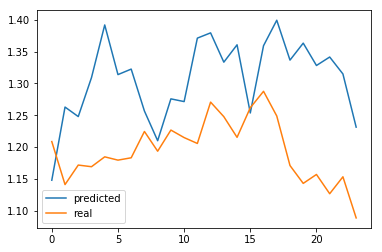

In [29]:
y_pred = model.predict(X_test)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

### LSTM on Windows - simultanous passing of window with size 20

In [30]:
X_train_t = X_train.reshape(X_train.shape[0], 1, 20)
X_test_t = X_test.reshape(X_test.shape[0], 1, 20)

In [31]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 20)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 6)                 648       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 655
Trainable params: 655
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train_t, y_train, epochs=100,
          batch_size=1, verbose=1, callbacks=[early_stop])

Epoch 1/100
415/415 [==============================] - 1s - loss: 0.0041     
Epoch 2/100
415/415 [==============================] - 1s - loss: 0.0022     
Epoch 3/100
415/415 [==============================] - 1s - loss: 0.0018     
Epoch 4/100
415/415 [==============================] - 1s - loss: 0.0016     
Epoch 5/100
415/415 [==============================] - 1s - loss: 0.0012     
Epoch 6/100
415/415 [==============================] - 1s - loss: 0.0013     
Epoch 7/100
415/415 [==============================] - 1s - loss: 0.0011     
Epoch 8/100
415/415 [==============================] - 1s - loss: 0.0010        
Epoch 9/100
415/415 [==============================] - 1s - loss: 0.0010        
Epoch 10/100
415/415 [==============================] - 1s - loss: 0.0011     
Epoch 11/100
415/415 [==============================] - 1s - loss: 0.0010        
Epoch 00010: early stopping


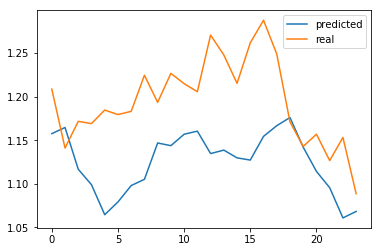

In [34]:
y_pred = model.predict(X_test_t)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])

### LSTM on windows - passing sequential to net

In [35]:
X_train_t = X_train.reshape(X_train.shape[0],20,1)
X_test_t = X_test.reshape(X_test.shape[0],20,1)

In [36]:
K.clear_session()
model = Sequential()

model.add(LSTM(8, input_shape=(20, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

In [38]:
model.fit(X_train_t, y_train, epochs=100, batch_size=1, verbose=1,callbacks=[early_stop])

Epoch 1/100
415/415 [==============================] - 5s - loss: 0.0296     
Epoch 2/100
415/415 [==============================] - 5s - loss: 0.0038     
Epoch 3/100
415/415 [==============================] - 5s - loss: 0.0037     
Epoch 4/100
415/415 [==============================] - 5s - loss: 0.0034     
Epoch 5/100
415/415 [==============================] - 5s - loss: 0.0037     
Epoch 6/100
415/415 [==============================] - 5s - loss: 0.0035     
Epoch 00005: early stopping


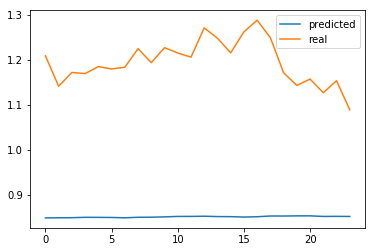

In [39]:
y_pred = model.predict(X_test_t)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['predicted', 'real'])